# Учебный проект 3_Исследование объявлений о продаже квартир

## Содержание

* [Описание проекта](#Описание)
* [Импорт библиотек Python и загрузка данных](#Импорт)
* [Предобработка данных](#Предобработка)
    * [Категоризация данных](#Категоризация)
* [Исследовательский анализ данных](#Исследование)
* [Вывод](#Вывод)

## Описание проекта <a class = 'anchor' id = 'Описание'></a>

На исследовании находятся данные сервиса Яндекс Недвижимость — `архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет`. 

**Задача**: `Определить рыночную стоимость объектов недвижимости`.

Путь решения: `Проведение исследовательского анализа данных и установка параметров, влияющих на цену объектов`. В дальнейшем это послужит основой для построения автоматизированной системы: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. **Первые вписаны пользователем**, **вторые — получены автоматически на основе картографических данных**.

Получены автоматически из геосервисов:
* расстояние до центра;
* расстояние до аэропорта;
* расстояние до других объектов;
* количество парков и водоёмов.

## Импорт библиотек Python и загрузка данных

Данный блок характеризуется следующими последовательными действиями:

1. Импорт библиотек Python:
    * для манипулирования данными;
    * для визуализации данных;
2. Загрузка данных в рабочую среду Jupyter Notebook. Инициализация переменной **data** для хранения загруженного датасета;
3. Вывод на экран параметров датасета:
    * вывод общей структуры набора данных - демонстрация первых 5 строк;
    * перечень столбцов набора данных;
    * общей информации о наборе данных;
4. Построение гистограмм распределения числовых показателей;
5. Формирование вывода по итогам данного этапа.

In [245]:
# импорт библиотек Python

# для манипулирования данными
import pandas as pd
import numpy as np

# для визуализации данных
import matplotlib.pyplot as plt

In [246]:
# инициализация переменной data - запись набора данных
data = pd.read_csv("~/Desktop/YandexPraktikum_projects/datasets/real_estate_data.csv", sep = '\t')

# вывод на экран структуры набора данных
display(data.head())

# вывод на экран перечня всех столбцов датасета
for column in data.columns.to_list():
    print(f'* {column}')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


* total_images
* last_price
* total_area
* first_day_exposition
* rooms
* ceiling_height
* floors_total
* living_area
* floor
* is_apartment
* studio
* open_plan
* kitchen_area
* balcony
* locality_name
* airports_nearest
* cityCenters_nearest
* parks_around3000
* parks_nearest
* ponds_around3000
* ponds_nearest
* days_exposition


**Описание данных**

* total_images - число фотографий квартиры в объявлении;
* last_price - цена на момент снятия с публикации;
* total_area - общая площадь квартиры, в квадратных метрах;
* first_day_exposition - дата публикации;
* rooms - число комнат;
* ceiling_height - высота потолков, в метрах;
* floors_total - всего этажей в доме;
* living_area - жилая площадь, в квадратных метрах;
* floor - этаж;
* is_apartment - апартаменты (булев тип данных);
* studio - квартира-студия (булев тип данных);
* open_plan - свободная планировка (булев тип данных);
* kitchen_area - площадь кухни, в квадратных метрах;
* balcony - число балконов;
* locality_name - название населенного пункта;
* airports_nearest - расстояние до ближайшего аэропорта, в метрах;
* cityCenters_nearest - расстояние до центра города, в метрах;
* parks_around3000 - число парков в радиусе 3 км;
* parks_nearest - расстояние до ближайшего парка, в метрах;
* ponds_around3000 - число водоемов в радиусе 3 км;
* ponds_nearest - расстояние до ближайшего водоема, в метрах;
* days_exposition - сколько дней было размещено объявление (от публикации до снятия);

In [247]:
# вывод на экран общей информации о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

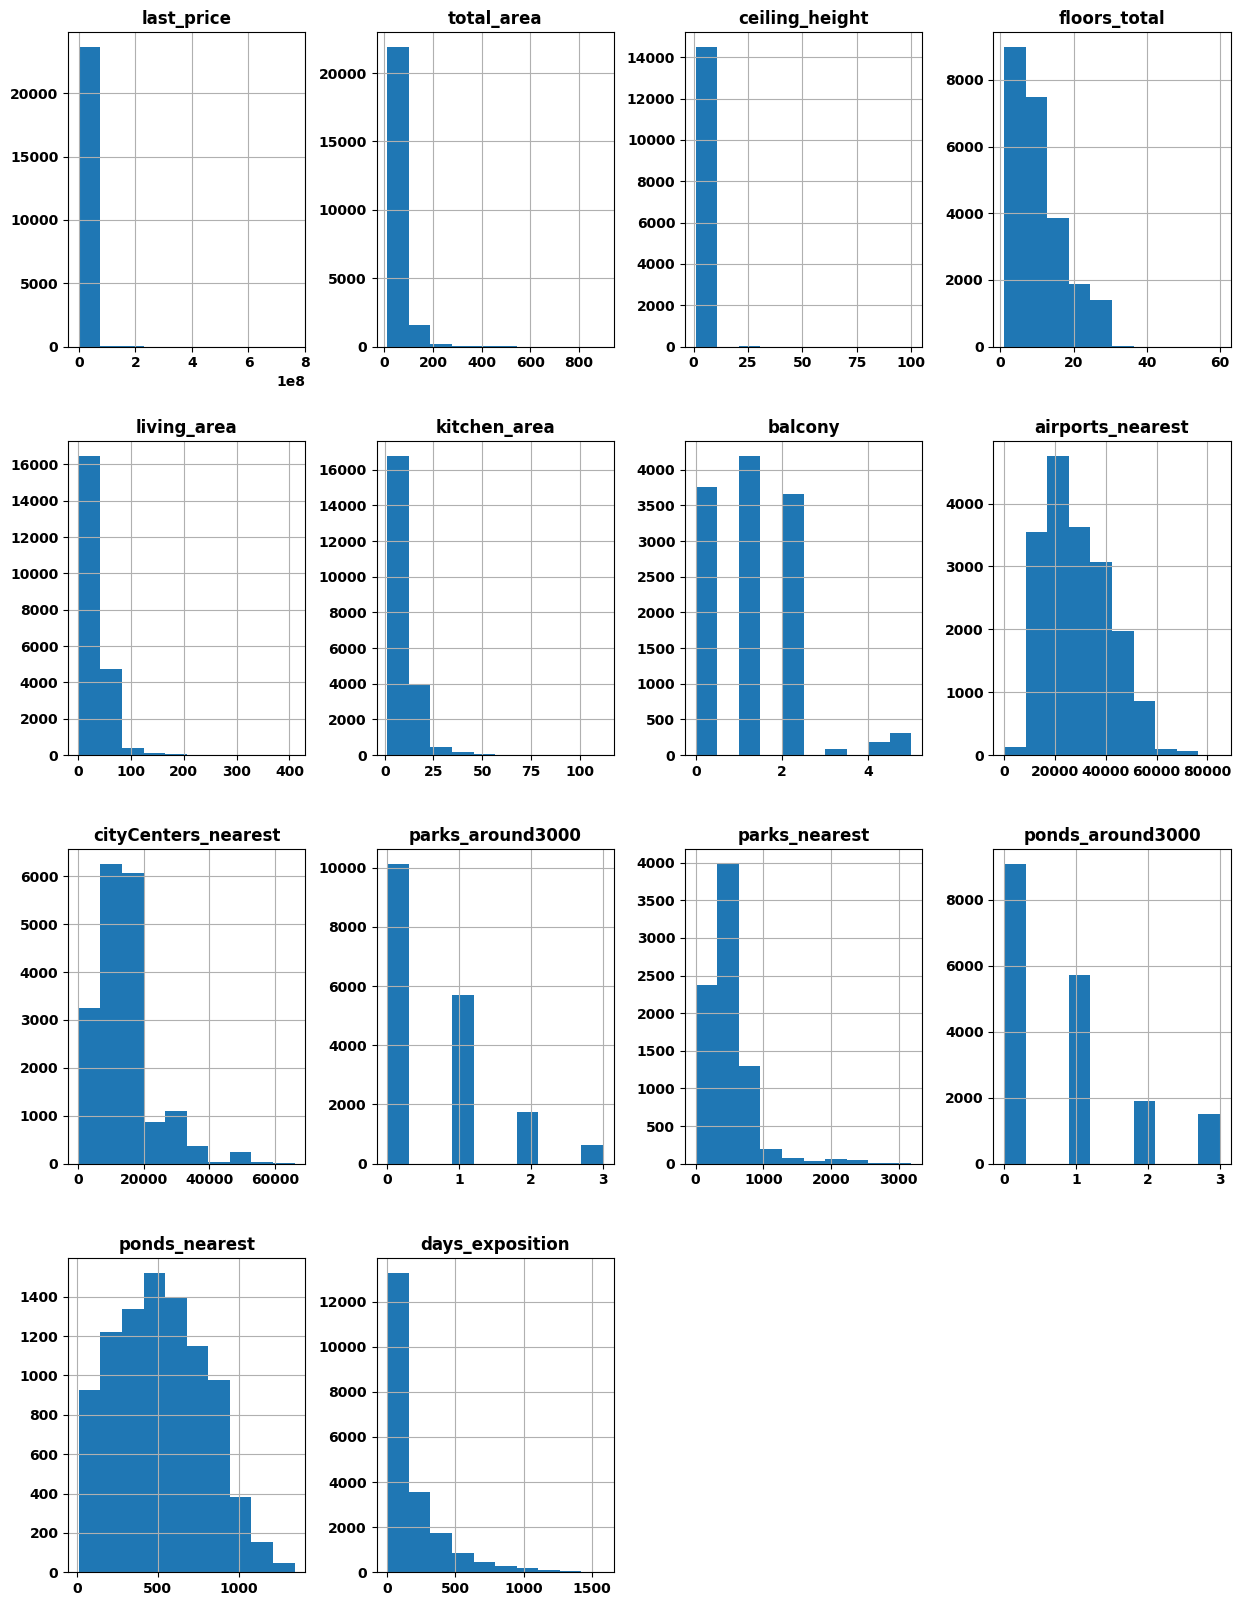

In [248]:
# построение диаграммы для всех числовых столбцов текущего набора данных
# plt.figure(figsize = (15, 20))
(data
 .select_dtypes(include='float64')
 .hist(figsize = (15, 20)))
plt.show()

**Вывод**:

1. Импортированы библиотеки Python:
    * для манипулирования данными - **pandas** и **numpy**;
    * для визуализации данных - **matplotlib.pyplot**;
2. Загружены данные в рабочую среду Jupyter Notebook. Инициализирована переменная **data** для хранения загруженного датасета;
3. Вывод на экран параметров датасета:
    * вывод общей структуры набора данных - демонстрация первых 5 строк;
    * переченя столбцов набора данных;
    * общей информации о наборе данных;
4. Набор данных характеризуется следующими показателями:
    * 23 699 - количество строк в датасете;
    * 22 - количество показателей, описывающих объект;
    * 2 столбца, имеющих явный булевый тип данных;
    * 14 столбцов, имеющих явный тип 'float';
    * 3 столбца - тип данных 'int';
    * 3 столбца - тип данных 'object';
    * 2 775 - самое минимальное количество непустых значений в столбце (признак 'is_apartment'); 
5. Построены гистограммы распределения числовых показателей. При первичном взгляде на полученные гистограммы заметны явные выбросы по признаку 'ceiling_height'. Детальное изучение гистограмм распределения будет выполнено на шаге предобработки данных;

## Предобработка данных <a class = 'anchor' id = 'Предобработка'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Обработка пустых значений в данных;
2. Преобразование типов данных в столбцах таблицы;
3. Проверка датасета на дубликаты и очистка данных:
    * Явные дубликаты;
    * Неявные дубликаты;
4. Формирование вывода по итогам данного этапа.

### Обработка пустых значений в данных <a class = 'anchor' id = 'Предобработка_пустоты'></a>

In [249]:
# вывод на экран количества пропущенных значений по столбцам
print("Количество пустых значений в столбцах датасета")
(data
 .isna()
 .sum()
 .sort_values(ascending=False))

Количество пустых значений в столбцах датасета


is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

Количество пустых значений в столбцах 'floors_total' и 'locality_name' слишком мало по сравнению с общим количеством данных в имеющемся наборе.

По этой причине можно удалить данные строки из общего датасета вместо попытки ручного заполнения пустот.

In [250]:
# удаление из набора данных пустых значений в столбцах 'floors_total' и 'locality_name'
for column in ['locality_name', 'floors_total']:
    data = data.dropna(subset = column)

В наборе данных есть объявления, где хозяин жилья указывает количество парков поблизости - "parks_around3000". Так же в наборе данных есть объявления, у которых указано расстояние до ближайшего парка - "parks_nearest".

При этом, есть большое количество пропущенных значений в столбце "parks_nearest", которые потенциально можно заменить средним или медианным значением расстояния при условии, что для данных записей выполняется условие: **"Есть парки поблизости, но расстояние до ближайшего не известно"**.

Выведем количество записей и их долю от общего набора, если они соответствуют условию выше.

In [251]:
# вывод на экран количества объектов, для которых известно наличие парков, но не указано расстояние до ближайшего
print('Количество объектов, где известно наличие парка в радиусе 3 км, но не известно расстояние до ближайшего:', data[(data['parks_nearest'].isna() == True) & (data['parks_around3000'].isna() == False)].shape[0])
print('Доля объявлений от общего набора данных: {:.1%}'.format(data[(data['parks_nearest'].isna() == True) & (data['parks_around3000'].isna() == False)].shape[0] / data.shape[0]))

Количество объектов, где известно наличие парка в радиусе 3 км, но не известно расстояние до ближайшего: 10035
Доля объявлений от общего набора данных: 42.6%


К сожалению, доля записей с неизвестным расстоянием, но с расположенными поблизости `парками`, слишком велика, чтобы заполнить пустоты одинаковым значением - **это внесет искажения в исходные данные и не позволит провести объективный анализ.**

Рассмотрим ту же самую ситуацию с тем же условием, но для данных о водоемах.

In [252]:
# вывод на экран количества объектов, для которых известно наличие водоемов, но не указано расстояние до ближайшего
print('Количество объектов, где известно наличие водоема в радиусе 3 км, но не известно расстояние до ближайшего:', data[(data['ponds_nearest'].isna() == True) & (data['ponds_around3000'].isna() == False)].shape[0])
print('Доля объявлений от общего набора данных: {:.1%}'.format(data[(data['ponds_nearest'].isna() == True) & (data['ponds_around3000'].isna() == False)].shape[0] / data.shape[0]))

Количество объектов, где известно наличие водоема в радиусе 3 км, но не известно расстояние до ближайшего: 9029
Доля объявлений от общего набора данных: 38.3%


К сожалению, доля записей с неизвестным расстоянием, но с расположенными поблизости `водоемами`, слишком велика, чтобы заполнить пустоты одинаковым значением - **это внесет искажения в исходные данные и не позволит провести объективный анализ.**

In [253]:
# замена пропусков в столбце 'is_apartment' нулевым значением
data['is_apartment'] = data['is_apartment'].fillna(False)

C:\Users\k.storozhuk\AppData\Local\Temp\ipykernel_8436\3482557872.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['is_apartment'] = data['is_apartment'].fillna(False)


Вполне вероятно, что пропуски в данном столбце обозначают, что дом/квартира не являются апартаментами, и домовладельцы решили не указывать это в явном виде.

Еще одним параметром, где можно вручную заполнить пустые значения, является `days_exposition`.
Предположение следующее: **Изучить данные на предмет последней даты публикации в столбце "first_day_exposition". Вполне возможно, что пустые значения в столбце "days_exposition" вызваны тем, что сами объявления были опубликованы в последнюю дату в наборе данных.**

In [254]:
# перевод значений даты из типа 'object' к типу 'datetime'
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

In [255]:
# вычисление количества записей, где дата публикации совпадает с последней датой в наборе данных, а количество дней в 'days_exposition' неизвестно
print('Количество самых последних (с точки зрения даты) объявлений:',
      data[(data['days_exposition'].isna() == True) & (data['first_day_exposition'] == data['first_day_exposition'].max())].shape[0])
print('Общее количество пустых значений в столбце "days_exposition":', data['days_exposition'].isna().sum())

Количество самых последних (с точки зрения даты) объявлений: 20
Общее количество пустых значений в столбце "days_exposition": 3171


Таких записей всего 20 из общего набора.

Заполним пропущенные значения в столбце "days_exposition" для таких объявлений нулевым значением. Для остальных же - оставим пустые значения.

In [256]:
# заполнение пустот в столбце 'days_exposition'
data.loc[(data['days_exposition'].isna() == True) & (data['first_day_exposition'] == data['first_day_exposition'].max()), 'days_exposition'] = 0

Среди оставшихся параметров, описывающих объекты недвижимости, остались `'kitchen_area', 'living_area' и 'cityCenters_nearest'`.

Подготовим пользовательскую функцию, которая визуализирует взаимосвязь между указанными показателями и показателем цены жилья - `'last_price'` - а также рассчитывает коэффициент корреляции между показателями.

In [257]:
# пользовательская функция исследования линейной взаимосвязи между двумя признаками набора данных
def corr_info (data: pd.DataFrame, first_feature: str, second_feature: str):
    data.plot(
        x = first_feature,
        y = second_feature,
        kind = 'scatter'
    )
    plt.show()

    print(f'Коэффициент корреляции Пирсона между {first_feature} и {second_feature}', data[first_feature].corr(data[second_feature]))

Взаимосвязь показателя living_area и "last_price


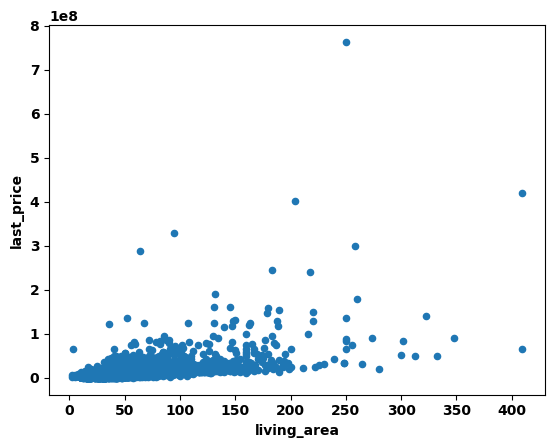

Коэффициент корреляции Пирсона между living_area и last_price 0.5663795524388774
Взаимосвязь показателя kitchen_area и "last_price


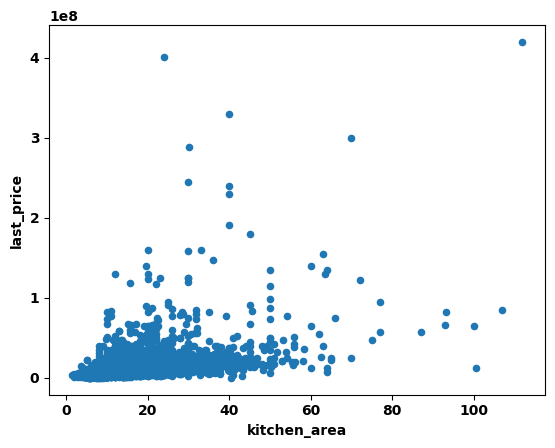

Коэффициент корреляции Пирсона между kitchen_area и last_price 0.5203617949655254
Взаимосвязь показателя cityCenters_nearest и "last_price


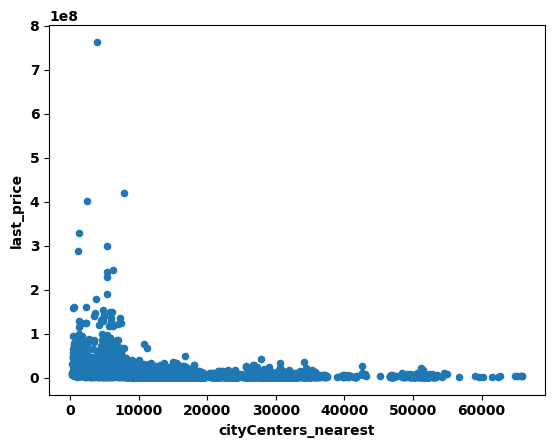

Коэффициент корреляции Пирсона между cityCenters_nearest и last_price -0.20635314264311044


In [258]:
# визуализация взаимосвязи и рассчет коэффициента корреляции
for feature in ['living_area', 'kitchen_area', 'cityCenters_nearest']:
    print(f'Взаимосвязь показателя {feature} и "last_price')
    corr_info(data, feature, 'last_price')

По итогам изучения визуализации данных и коэффициентов линейной связи двух переменных можно сделать следующий вывод:

1. Существует положительная связь между стоимостью недвижимости и жилой площадью - при увеличении жилой площади возрастает и итоговая цена недвижимости;
2. Существует положительная связь между стоимостью недвижимости и площадью кухни - при увеличении площади кухни возрастает и итоговая цена недвижимости;
3. Не замечено связи между удаленностью от центра и стоимостью недвижимости.

**Данные выводы можно использовать для дальнейшего заполнения пропусков**.

`Предлагается в зависимости от стоимости жилья сформировать группы недвижимости. В указанных группах жилье будет обладать примерно схожими признаками, исходя из этого можно будет пустые значения в параметрах 'living_area' и 'kitchen_area' заполнить выбранной мерой центральной тенденции (медианой или средним значением).`

In [259]:
# вывод на экран статистических показателей по столбцу 'last_price'
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [260]:
# пользовательская функция по присвоению групп для жилья в зависимости от стоимости
def price_category(last_price):
    if last_price < 1_000_001:
        return "E"
    elif last_price < 2_500_001:
        return "D"
    elif last_price < 5_000_001:
        return "C"
    elif last_price < 10_000_001:
        return "B"
    else:
        return "A"

In [261]:
# создание нового столбца с группами цен
data['price_group'] = data['last_price'].apply(price_category)

Так как в группе "А", обозначающей высокоценовое жилье, разброс стоимости продажи слишком велик (это сказывается и на параметрах дома/квартиры), то лучше воспользоваться медианнымы значениями жилой площади ('living_area') и площади кухни ('kitchen_area') для заполнения пустот.

In [262]:
# вложенный цикл по заполнению пустых значений в столбцах 'kitchen_area' и 'living_area' медианным значением
for feature in ['kitchen_area', 'living_area']:
    for group in list(data['price_group'].unique()):
        median_value = data[data['price_group'] == group][feature].median()
        data.loc[(data['price_group'] == group) & (data[feature].isna()), feature] = median_value

In [263]:
# заполнение пустых значений в столбцах, обозначающих количество водоемов и парков в радиусе 3 км
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)

In [264]:
# заполнение пустых значений в столбце, сообщающем о количестве балконов
data['balcony'] = data['balcony'].fillna(0)

In [265]:
# вывод на экран текущего количества пустых значений в наборе данных
data.isna().sum().sort_values(ascending = False)

parks_nearest           15535
ponds_nearest           14529
ceiling_height           9084
airports_nearest         5524
cityCenters_nearest      5501
days_exposition          3151
total_images                0
kitchen_area                0
ponds_around3000            0
parks_around3000            0
locality_name               0
balcony                     0
open_plan                   0
last_price                  0
studio                      0
is_apartment                0
floor                       0
living_area                 0
floors_total                0
rooms                       0
first_day_exposition        0
total_area                  0
price_group                 0
dtype: int64

**Причины появления пропусков в наборе данных**

1. Так как недвижимость не является апартаментами - `'is_apartment'` - владелец объявления явно об этом не указал;
2. Владельцы объявлений решили дополнительно не указывать площадь кухни и жилых помещений - `'kitchen_area' и 'living_area'` - так как уже указали общую площадь объекта недвижимости;
3. Большинство пользователей дополнительно не измеряли расстояние до ближайшего парка или водоема - `'parks_nearest' и 'ponds_nearest'` - ограничившись указанием количества этих объектов поблизости - `'parks_around3000' и 'ponds_around3000'`;
4. Владельцы объявлений не измеряли высоту потолков - `'ceiling_height'` - так как посчитали это необязательным параметром для размещения объявления;

Таким образом, все обозначенные выше причины появления пропусков можно объединить в категорию **"Человеческий фактор"**.

### Преобразование типов данных в столбцах таблицы <a class = 'anchor' id = 'Предобработка_типы'></a>

Столбцы, в которых необходимо изменить тип данных:

* 'floors_total' - преобразовать к типу **Int**;
* 'is_apartment' - преобразовать к типу **Bool**;
* 'balcony' - преобразовать к типу **Int**;
* 'parks_around3000' - преобразовать к типу **Int**;
* 'days_exposition' - преобразовать к типу **Int**

In [266]:
# изменение типа данных в столбце 'is_apartment'
data['is_apartment'] =  data['is_apartment'].astype('bool')

# изменение типов данных на целочисленный в обозначенных столбцах
for feature in ['floors_total', 'balcony', 'parks_around3000']:
    data[feature] = data[feature].astype('Int64')

In [267]:
# выведем на экран типы данных значений в датасете
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     Int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          Int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000                 Int64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
price_group                     object
dtype: object

**Причины изменения типов данных в существующем наборе**

Замена типов данных для значений необходима по той причине, что типы должны соответствовать сути, представляемой в столбце информации, а также - для дальнейшего корректного взаимодействия с данными и проведения вычислений, группировок и извлечения информаци с помощью методов, соответствующих определенным типам данных.

### Проверка датасета на наличине дубликатов <a class = 'anchor' id = 'Предобработка_дубликаты'></a>

In [268]:
# вывод на экран уникальных значений столбца 'locality_name'
print(sorted(data['locality_name'].unique()))
print('Количество уникальных названий населенных пунктов:', data['locality_name'].nunique())

['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург', 'городской поселок Большая Ижора', 'городской поселок Янино-1', 'городской посёлок Будогощь', 'городской посёлок Виллози', 'городской посёлок Лесогорский', 'городской посёлок Мга', 'городской посёлок Назия', 'городской посёлок Новоселье', 'городской посёлок Павлово', 'городской посёлок Рощино', 'городской посёлок Свирьстрой', 'городской посёлок Советский', 'городской посёлок Фёдоровское', 'городской посёлок Янино-1', 'деревня Агалатово', 'деревня Аро',

In [269]:
data['locality_name'] = data['locality_name'].str.lower()

for place_type in ['поселок ', 'посёлок ', 'городского типа ',
                   'село ', 'деревня ', 'пгт ', 'городской ',
                   'садовое ', 'товарищество ', 'коттеджный ',
                   'пансионат ', 'садоводческое ', 'некоммерческое ', 'станции ', 'при железнодорожной ']:
    data['locality_name'] = data['locality_name'].str.replace(place_type, '')

print('Количество уникальных названий населенных пунктов после обработки:', data['locality_name'].nunique())

Количество уникальных названий населенных пунктов после обработки: 305


In [270]:
# проверка набора данных на явные дубликаты
data.duplicated().sum()

0

### Инициализация новых столбцов в наборе данных <a class = 'anchor' id = 'Предобработка_столбцы'></a>

In [271]:
# инициализация параметра "цена за квадратный метр"
data['price_per_square'] = round(data['last_price'] / data['total_area'], 2)

# день публикации объявления
data['week_day'] = data['first_day_exposition'].dt.dayofweek

# месяц публикации объявления
data['month'] = data['first_day_exposition'].dt.month

# год публикации объявления
data['year'] = data['first_day_exposition'].dt.year

In [272]:
# пользовательская функция по категоризации этажа квартиры
def floor_category (floor_number):
    if floor_number == 1:
        return "первый"
    else:
        return "другой"

In [273]:
# инициализация столбца с типом этажа квартиры
data['floor_type'] = data['floor'].apply(floor_category)

# ввод категории "последний"
data.loc[data['floor'] == data['floors_total'], 'floor_type'] = 'последний'

In [274]:
# инициализация столбца с расстоянием до центра города в километрах
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1_000)

In [275]:
# вывод на экран структуры датасета после всех преобразований
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_group,price_per_square,week_day,month,year,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,NaN,A,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,0.0,NaN,81.0,C,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,2.0,574.0,558.0,B,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,60.0,9,False,...,3.0,234.0,424.0,A,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121.0,B,100000.00,1,6,2018,другой,8.0


## Исследовательский анализ данных <a class = 'anchor' id = 'Исследование'></a>

### Построение гистограмм распределения значений <a class = 'anchor' id = 'Исследование_гистограммы'></a>

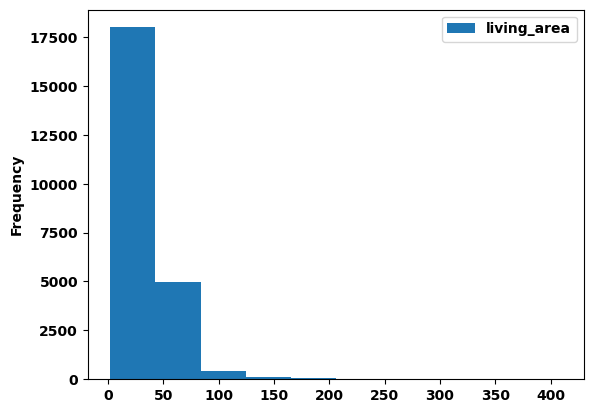

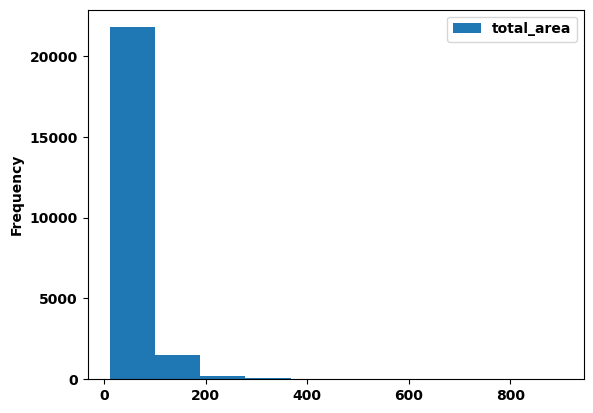

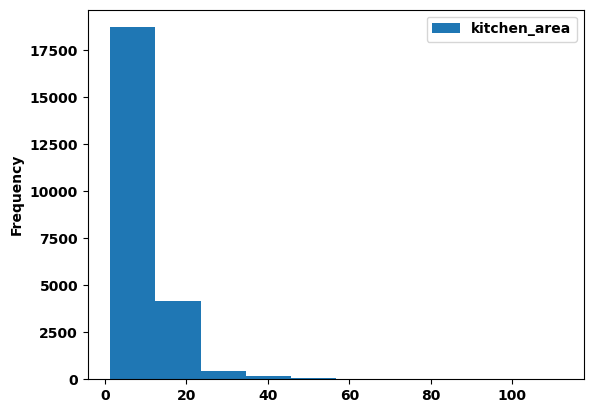

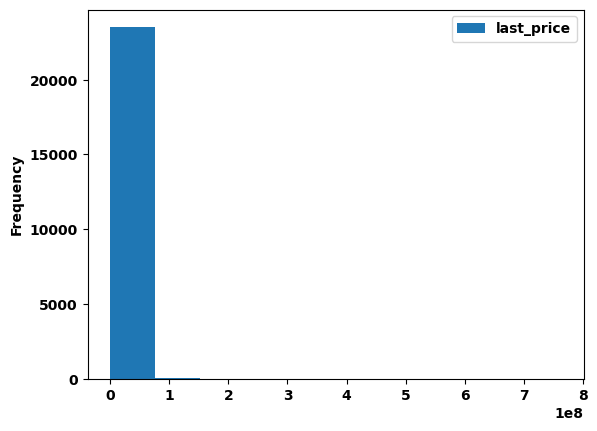

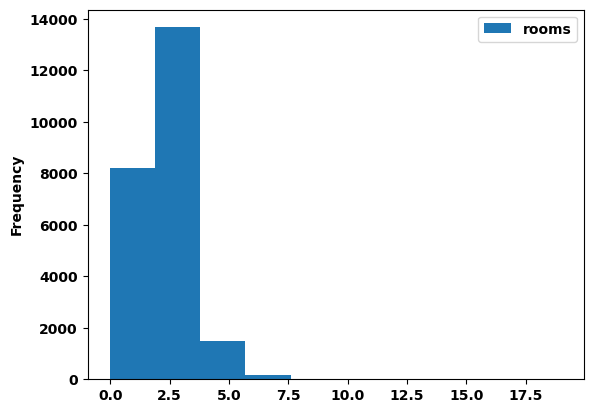

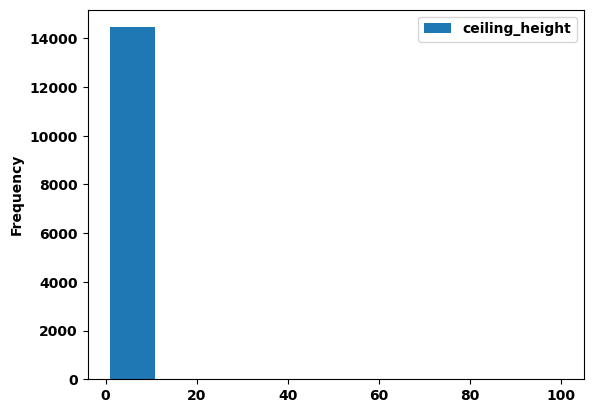

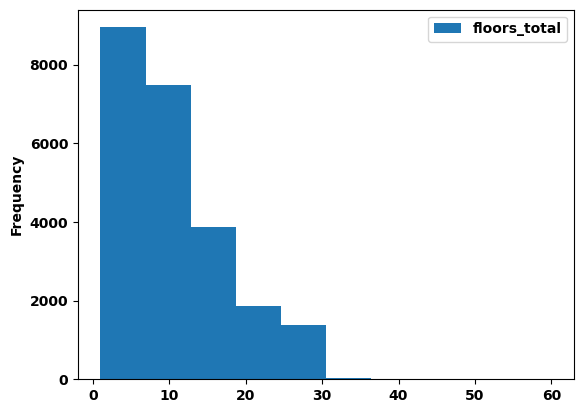

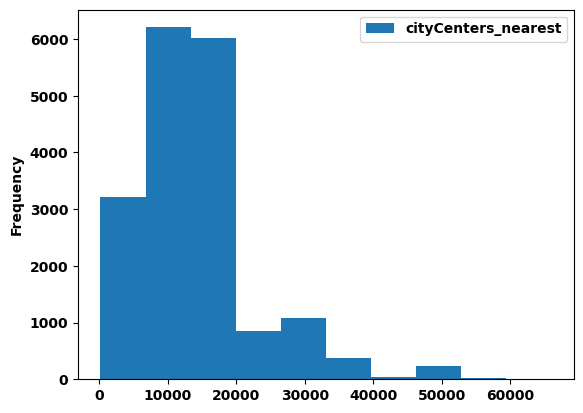

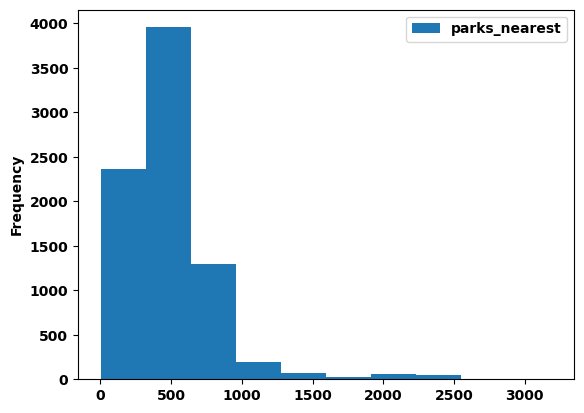

In [276]:
# сформируем список показателей для построения гистограмм
hist_feature_list = ['living_area', 'total_area', 'kitchen_area', 'last_price', 'rooms',
                     'ceiling_height', 'floors_total', 'cityCenters_nearest', 'parks_nearest']

# проходимся циклом и формируем гистограммы распределения значений
for feature in hist_feature_list:
    data.plot(y = feature, kind = 'hist')

**Вывод по построенной визуализации**

1. По значениям `'total_area', 'kitchen_area' и 'living_area'` аномальных значений не обнаружено. В наборе данных представлено самое разнообразное жилье: **квартиры (как в многоэтажных домах, так и в малоэтажных) бюджетного и элитного класса, загородные дома, коттеджи, элитное частное жилье. Значения площади объекта могут вполне удовлетворять реальной ситуации;
2. Значения цены - `'last_price'` - это субъективная (а может, и объективная) оценка владельцем своего актива. Действительно - часть цен выбивается из общего набора, но это может быть реальный объект жилья элитного класса;
3. Высота потолков `'ceiling_height'` уже содержит аномальные значения - сложно представить себе жилье в настоящее время, у которого высота потолка (даже в частном доме) была бы больше 10 метров (такое помещение будет, банально, сложнее обогревать). **Дополнительно выведем на экран статистическую информацию по столбцу с высотой потолков**.;
4. Столбец с количеством этажей в доме - `'floors_total'` - вполне вероятно содержит аномальные значения, но его нужно рассмотреть в совокупности с названием населенного пункта: представить 30-этажный дом в Санкт-Петербурге вполне можно, а в каком-нибудь селе - нет.
5. Показатели по расстоянию до географических объектов - `'parks_nearest' и 'cityCenters_nearest'` - аномалий не содержат, но возникает вопрос, до какого центра считается расстояние. Представить удаленность от центра 50 км достаточно сложно, если только за **центр города** не принят Санкт-Петербург.

Диаграмма распределения значений в формате "Ящик с усами" по параметру "ceiling_height"


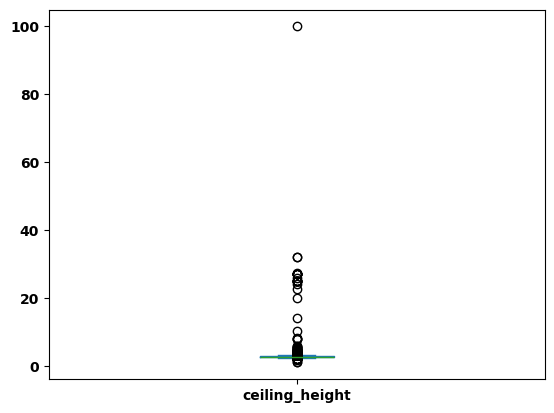

Статистика по столбцу "ceiling_height"
count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


In [277]:
# вывод на экран статистики по столбцу 'ceiling_height'
print('Диаграмма распределения значений в формате "Ящик с усами" по параметру "ceiling_height"')
data['ceiling_height'].plot(kind = 'box')
plt.show()

print('Статистика по столбцу "ceiling_height"')
print(data['ceiling_height'].describe())

Исходя из демонстрируемых показателей, необходимо исключить аномальные значения из набора.

Примем, что, **если значение выбивается из границ допустимых значений (1.5 межквартильных размаха), то такие объекты исключаем из общего набора со следуюшей вводной: верхняя граница фильтрации значений будет 10 метров, так как такие варианты потолков существуют в жилье элитного класса**.

In [278]:
# инициализация переменной IQR - межквартильный размах
IQR = data['ceiling_height'].quantile(0.75) - data['ceiling_height'].quantile(0.25)

# формирование нижней границы данных по потолкам
lower_bound = data['ceiling_height'].quantile(0.25) - 1.5 * IQR

print('Количество записей в датасете ДО фильтрации аномальных значений в "ceiling_height":', data.shape[0])
# фильтрация аномальных значений по высоте потолков
data = data[(data['ceiling_height'].isna() == True) | ((data['ceiling_height'] >= lower_bound) & (data['ceiling_height'] <= 10))]
print('Количество записей в датасете ПОСЛЕ фильтрации аномальных значений в "ceiling_height":', data.shape[0])
print('Максимальная высота потолков в текущем наборе данных:', data['ceiling_height'].max())

Количество записей в датасете ДО фильтрации аномальных значений в "ceiling_height": 23565
Количество записей в датасете ПОСЛЕ фильтрации аномальных значений в "ceiling_height": 23526
Максимальная высота потолков в текущем наборе данных: 8.3


In [279]:
# вывод на экран локации домов с количеством этажей больше 30
data[data['floors_total'] >= 30]['locality_name'].unique()

array(['санкт-петербург', 'кронштадт'], dtype=object)

Представить дома этажностью выше, чем "30", в таком месте как Кронштадт очень сложно. Скорее всего это может быть либо намеренное введение пользователя в заблуждение, либо попытка нечестной продажи жилья - случай "черного риелторства".  

In [280]:
# фильтрация значений по обозначенному выше условию
data = data[~((data['floors_total'] >= 30) & (data['locality_name'] == 'кронштадт'))]

### Изучение скорости продажи недвижимости <a class = 'anchor' id = 'Исследование_показОбъявлений'></a>

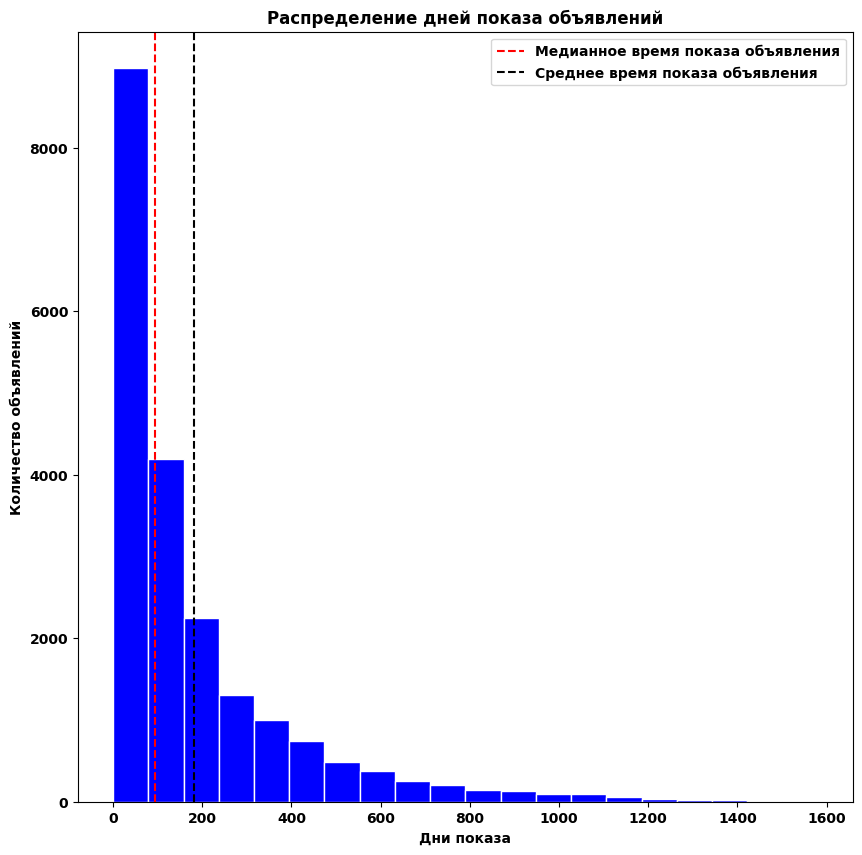

In [281]:
# построение гистограммы распределения времени показа объявлений
plt.figure(figsize = (10, 10))
plt.hist(data['days_exposition'], color = 'blue', edgecolor = 'white', bins = 20)
plt.axvline(data['days_exposition'].median(), c = 'red', ls = '--', label = 'Медианное время показа объявления')
plt.axvline(data['days_exposition'].mean(), c = 'black', ls = '--', label = 'Среднее время показа объявления')
plt.title('Распределение дней показа объявлений')
plt.xlabel('Дни показа')
plt.ylabel('Количество объявлений')
plt.legend()
plt.show()

In [286]:
# вывод на экран описательной статистики
print('Описательная статистика по количеству дней размещения объявлений о продаже')
display(data['days_exposition'].describe())

Описательная статистика по количеству дней размещения объявлений о продаже


count    20383.000000
mean       180.638817
std        219.794498
min          0.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Вывод по построенной визуализации**



### Изучение стоимости жилья в 10 самых популярных населенных пунктах <a class = 'anchor' id = 'Изучение_топ10'></a>

In [294]:
# создание сводной таблицы для формирования топ-10 мест по числу объявлений
top_10_places = data.pivot_table(index = 'locality_name',
                 values = 'price_per_square',
                 aggfunc = ['count', 'mean'])
top_10_places.columns = ['total_ads', 'mean_price']
top_10_places = top_10_places.sort_values(by = 'total_ads', ascending = False).head(10)

print('ТОП-10 населенных пунктов с наибольшим количеством объявлений')
display(top_10_places)
print()
print('Населенный пункт среди ТОП-10 с НАИБОЛЬШЕЙ стоимостью 1 квадратного метра:', top_10_places[top_10_places['mean_price'] == max(top_10_places['mean_price'].values)].index[0])
print('Населенный пункт среди ТОП-10 с НАИМЕНЬШЕЙ стоимостью 1 квадратного метра:', top_10_places[top_10_places['mean_price'] == min(top_10_places['mean_price'].values)].index[0])

ТОП-10 населенных пунктов с наибольшим количеством объявлений


,total_ads,mean_price
locality_name,,
санкт-петербург,15632,114848.951747
мурино,584,86018.110873
кудрово,469,95261.963412
шушары,439,78551.344647
всеволожск,397,68719.320378
пушкин,369,103125.819377
колпино,338,75424.579112
парголово,327,90175.913089
гатчина,306,68757.678399



Населенный пункт среди ТОП-10 с НАИБОЛЬШЕЙ стоимостью 1 квадратного метра: санкт-петербург
Населенный пункт среди ТОП-10 с НАИМЕНЬШЕЙ стоимостью 1 квадратного метра: выборг


### Изучение стоимости недвижимости в Санкт-Петербурге в зависимости от расположения от центра города <a class = 'anchor' id = 'Исследование_центрПитера'></a>

<Axes: xlabel='cityCenters_nearest_km'>

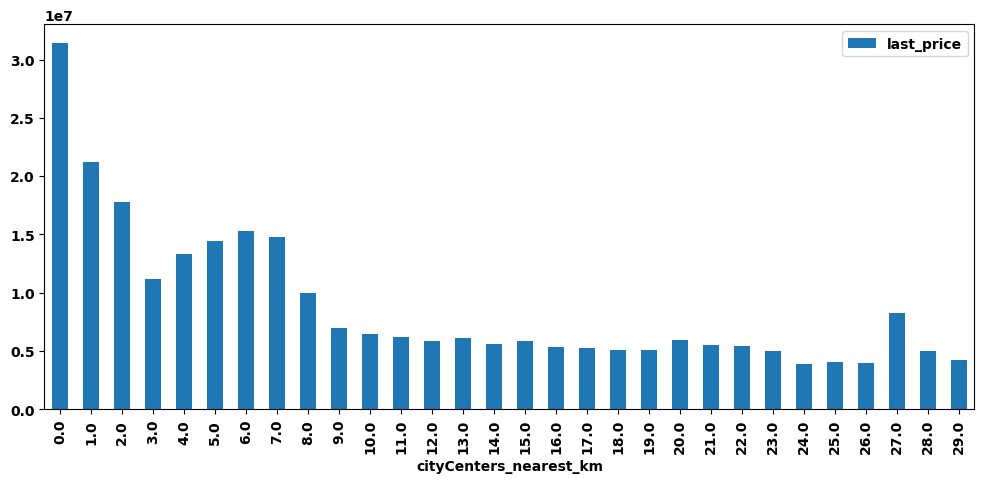

In [300]:
(data[data['locality_name'] == 'санкт-петербург']
 .groupby('cityCenters_nearest_km').agg({'last_price':'mean'})
 .plot(kind = 'bar', figsize = (12, 5)))